### Import Modules

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import yaml
from features import model, utils

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Using 'cuda' now.


### Load Model

In [2]:
def load_config(config_path="default.yaml"):
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)

    config["save_dir"] = f'./results/{config["prefix"]} {config["model"]["type"]}_{config["model"]["name"]}_{config["dataset"]["name"]}_{config["training"]["num_epochs"]}epochs_h{config["model"]["hidden_size"]}_d{config["model"]["layer_depth"]}_drop{config["model"]["drop_out"]}_r{config["attack"]["inject_ratio"]}'

    return config

config_path = "./default.yaml"
config = load_config(config_path)

model_name = config["model"]["name"]
drop_out = config["model"]["drop_out"]
input_size = config["model"]["input_size"]
hidden_size = config["model"]["hidden_size"]
layer_depth = config["model"]["layer_depth"]
num_classes = config["model"]["num_classes"]

target_model = model.CNN_Model(
    feature_model = model_name,
    drop_out = drop_out,
    input_size = input_size,
    hidden_size = hidden_size,
    layer_depth = layer_depth,
    nb_classes = num_classes,
).to(device)

target_model = torch.load(f"{config['save_dir']}/best_model_accuracy.pth", weights_only=False)
print(target_model)

CNN_Model(
  (feature_extractor): ResNet18(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(6

### Extraction

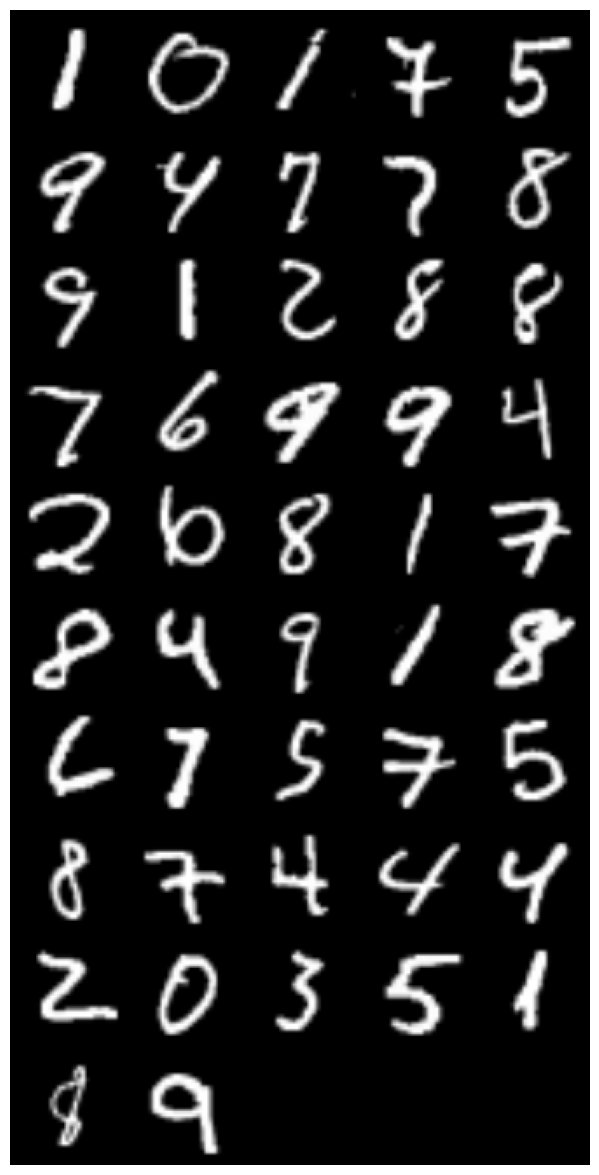

In [3]:
def show_img(images):
    grid = vutils.make_grid(images, nrow=5, normalize=True, scale_each=True)

    grid = grid.permute(1, 2, 0).detach().cpu().numpy()

    plt.figure(figsize=(15, 15))
    plt.imshow(grid)
    plt.axis("off")
    plt.show()

inject_ratio = config["attack"]["inject_ratio"]
norm = config["attack"]["norm"]
extracted_data = utils.extract_data(device, target_model, input_size, inject_ratio, norm)

show_img(extracted_data)